In [4]:
from __future__ import print_function
import torch

# Getting Started

## Tensors

In [5]:
# Construct a 5x3 matrix, uninitialized:
x = torch.Tensor(5, 3)
print(x)


 0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  1.8579e+34  1.8179e+31
 1.8524e+28  9.6647e+35  1.2849e+31
 1.7751e+28  2.1975e+23  7.1846e+22
 7.7052e+31  6.9151e+28  4.5432e+30
[torch.FloatTensor of size 5x3]



In [6]:
# Construct a randomly initialized matrix
x = torch.rand(5, 3)
print(x)


 0.8097  0.8337  0.7608
 0.0059  0.0269  0.3194
 0.9099  0.1188  0.2877
 0.1401  0.9899  0.7881
 0.9976  0.4536  0.1993
[torch.FloatTensor of size 5x3]



In [7]:
# Get its size
print(x.size())

torch.Size([5, 3])


## Operations

In [8]:
# Addition : syntax 1
y = torch.rand(5, 3)
print(x + y)


 1.3703  1.1857  1.5958
 0.0094  0.6533  1.2467
 1.5776  0.1196  1.2492
 0.9352  1.2413  1.5846
 1.4091  0.9455  0.2863
[torch.FloatTensor of size 5x3]



In [9]:
# Addition : syntax 2
print(torch.add(x, y))


 1.3703  1.1857  1.5958
 0.0094  0.6533  1.2467
 1.5776  0.1196  1.2492
 0.9352  1.2413  1.5846
 1.4091  0.9455  0.2863
[torch.FloatTensor of size 5x3]



In [10]:
# Addition: giving an output tensor
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)
print(result)


 1.3703  1.1857  1.5958
 0.0094  0.6533  1.2467
 1.5776  0.1196  1.2492
 0.9352  1.2413  1.5846
 1.4091  0.9455  0.2863
[torch.FloatTensor of size 5x3]



In [11]:
# Addition: in-place
y.add_(x) # equals to y = y.add(x)
print(x)


 0.8097  0.8337  0.7608
 0.0059  0.0269  0.3194
 0.9099  0.1188  0.2877
 0.1401  0.9899  0.7881
 0.9976  0.4536  0.1993
[torch.FloatTensor of size 5x3]



In [12]:
# supports numpy-like indexing
print(x[:,1])


 0.8337
 0.0269
 0.1188
 0.9899
 0.4536
[torch.FloatTensor of size 5]



# Numpy Bridge
- Supports converting a torch Tensor to a numpy array and vice versa.
- The torch Tensor and numpy array will share their underlying memory locations, and changing one will change the other.
- All the Tensors on the CPU except a CharTensor support converting to NumPy and back.

## Converting torch Tensor to numpy Array

In [13]:
a = torch.ones(5)
print(a)
print(type(a))


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]

<class 'torch.FloatTensor'>


In [14]:
b = a.numpy()
print(b)
print(type(b))

[ 1.  1.  1.  1.  1.]
<class 'numpy.ndarray'>


In [15]:
# See how the numpy array changed in value.
a.add_(1)
print(a)
print(b)


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

[ 2.  2.  2.  2.  2.]


## Converting numpy Array to torch Tensor

In [16]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a) #convert
np.add(a, 1, out=a)
print(a)
print(b)

[ 2.  2.  2.  2.  2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



## CUDA Tensors

In [17]:
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    x + y
    print("yes")

# Autograd: automatic differentiation

## Variable

In [18]:
from torch.autograd import Variable

In [108]:
# Create a variable:
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)

m = Variable(torch.Tensor([1,2,1]))
n = Variable(torch.Tensor([2,0,1]))
s = n[0]
s = s * -1
print(s)
print((s.data < 0).numpy())
print("here")
# zero= Variable(torch.FloatTensor([0]))
# print(zero)
# print("aaa")
torch.max(Variable(torch.FloatTensor([0])), s)
loss = torch.max(Variable(torch.FloatTensor([0])), s * -1)
print(loss)
print(s.grad_fn)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

Variable containing:
-2
[torch.FloatTensor of size 1]

[1]
here
Variable containing:
 2
[torch.FloatTensor of size 1]



In [20]:
# Do an operation of variable:
y = x + 2
print(y)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [21]:
# y was created as a result of an operation, so it has a grad_fn.
# the .grad_fn attribute that references a Function that has created the Variable (except for Variables created by the user - their grad_fn is None
print(y.grad_fn)

In [22]:
# do more operations on y
z = y * y * 3
out = z.mean()
print(z, out)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



## Gradients

In [23]:
out.backward()

In [24]:
# print gradients d(out)/dx
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



In [25]:
# another example
x = torch.randn(3)
print(x)
x = Variable(x, requires_grad=True)
y = x * 2
while y.data.norm() < 1000:
    y = y * 2
print(y)


-0.3468
-0.6303
 1.0487
[torch.FloatTensor of size 3]

Variable containing:
 -355.1559
 -645.4034
 1073.9128
[torch.FloatTensor of size 3]



In [251]:
"""
varibale.backward()
        Computes the gradient of current variable w.r.t. graph leaves.
        The graph is differentiated using the chain rule. If the variable is
        non-scalar (i.e. its data has more than one element) and requires
        gradient, the function additionally requires specifying ``gradient``.
        It should be a tensor of matching type and location, that contains
        the gradient of the differentiated function w.r.t. ``self``.   ???
"""

gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

Variable containing:
  51.2000
 512.0000
   0.0512
[torch.FloatTensor of size 3]



# Neural Networks

A typical training procedure for a neural network is as follows:
- Define the neural network that has some learnable parameters (or weights)
- Iterate over a dataset of inputs
- Process input through the network
- Compute the loss (how far is the output from being correct)
- Propagate gradients back into the network’s parameters
- Update the weights of the network, typically using a simple update rule:
        weight = weight - learning_rate * gradient

> a sample netwrok structure:
![title](./img1.png)

## Define the (above) network

In [252]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution / kernel / filter / neuron
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, input): # must define for a nn, tells about the structure
        """
        We just have to define the forward function, 
        and the backward function (where gradients are computed) 
        is automatically defined for you using autograd. 
        You can use any of the Tensor operations in the forward function.
        
        The input to the forward is an autograd.Variable, and so is the output. 
        Note: Expected input size to this net(LeNet) is 32x32.
        """
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(input)), (2, 2)) # first convolve the input, 
                                                            # then use relu as activation function
                                                            # then use max pooling (2*2 widow)
                                                            # output is x
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)          # use the previous output and continue feed forward
        x = x.view(-1, self.num_flat_features(x)) # view returns a new tensor with the same data but different size
                                                  # the size -1 is inferred from other dimensions (the ret value 
                                                  # of self.num_flat_features() here)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)   # why last layer has no activation??
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:] # all dimensions except the batch dimension ??
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
print(net)
    
        

Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)


In [253]:
# The learnable parameters of a model are returned by net.parameters()
params = list(net.parameters())
print(len(params))
print(params[0].size()) # conv1's .weight
print(params[1].size()) # activation function ???
print(params[2].size()) # conv2's .weight
print(params[3].size()) # ???
print(params[4].size()) # fc1's .weight
print(params[5].size()) # ???
print(params[6].size()) # fc2's .weight
print(params[7].size()) # ???
print(params[8].size()) # fc3's .weight
print(params[9].size()) # ???

10
torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([16, 6, 5, 5])
torch.Size([16])
torch.Size([120, 400])
torch.Size([120])
torch.Size([84, 120])
torch.Size([84])
torch.Size([10, 84])
torch.Size([10])


> Note: 
torch.nn only supports mini-batches The entire torch.nn package only supports inputs that are a mini-batch of samples, and not a single sample.

> For example, nn.Conv2d will take in a 4D Tensor of nSamples x nChannels x Height x Width.
If you have a single sample, just use input.unsqueeze(0) to add a fake batch dimension.

In [254]:
# Expected input size to this net(LeNet) is 32x32. 
# To use this net on MNIST dataset, please resize 
# the images from the dataset to 32x32.
input = Variable(torch.randn(1, 1, 32, 32)) # a 4D Tensor of nSamples x nChannels x Height x Width.
out = net(input)
print(out)

Variable containing:
 0.0170 -0.0979  0.0878  0.1058 -0.0137 -0.0228 -0.1221 -0.0359 -0.1216  0.0169
[torch.FloatTensor of size 1x10]



In [255]:
# Zero the gradient buffers of all parameters and backprops with random gradients
net.zero_grad()
# call backward
out.backward(torch.randn(1, 10))

## Loss Function
- A loss function takes the (output, target) pair of inputs, and computes a value that estimates how far away the output is from the target.
- There are several different loss functions under the nn package . A simple loss is: nn.MSELoss which computes the mean-squared error between the input and the target.

In [256]:
# nn.MSELoss example
input = Variable(torch.randn(1, 1, 32, 32))
output = net(input)
target = Variable(torch.arange(1, 11))  # arange: Returns a 1D Tensor of size 
                                        # floor((end−start)/step)floor((end−start)/step) 
                                        # with values from the interval [start, end) 
                                        # taken with step step starting from start.
criterion = nn.MSELoss()

loss = criterion(out, target)
print(loss)

Variable containing:
 38.8592
[torch.FloatTensor of size 1]



- So, when we call loss.backward(), the whole graph is differentiated w.r.t. the loss, and all Variables in the graph will have their .grad Variable accumulated with the gradient.
- The graph of computations of above net is as below:
    
    
   
    input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
          -> view -> linear -> relu -> linear -> relu -> linear
          -> MSELoss
          -> loss

In [257]:
print(loss.grad_fn) #MSELoss
print(loss.grad_fn.next_functions[0][0]) # linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) # ReLU

## Backprop
- Before use loss.backward(), we need to clear the existing gradients, otherwise gradients will be accumulated to existing gradients 
- (this should be done for every traning example (or batch))

In [258]:
net.zero_grad()
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad) # what is .bias

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]



RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

## Update the weights
- The simplest update rule used in practice is the Stochastic Gradient Descent (SGD):

        weight = weight - learning_rate * gradient
- To use other different update rules such as SGD, Nesterov-SGD, Adam, RMSProp, etc. To enable this, use the official package: <font color='red'>**torch.optim**</font> that implements all these methods

In [259]:
# example SGD update:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate) # what is sub_; f.data???

In [260]:
# example of torch.optim
import torch.optim as optim

# create the optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad() # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() # Does the update

# Training a classifier

To deal with image, text, audio or video data, you can use standard python packages that load data into a numpy.  Then you can convert this array into a **torch.*Tensor** array
- For images, packages such as torchVision, Pillow, OpenCV are useful.
    - torchvision has data loaders for common datasets such as Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz., torchvision.datasets and torch.utils.data.DataLoade
- For audio, packages such as scipy and librosa
- For text, either raw Python or Cython based loading, or NLTK and SpaCy are useful.

## Training an image classifier
steps:
- Load and normalizing the CIFAR10 training and test datasets using torchvision
- Define a Convolution Neural Network
- Define a loss function
- Train the network on the training data
- Test the network on the test data

### 1. Loading and normalizing CIFAR10

In [261]:
import torch
import torchvision
import torchvision.transforms as transforms

In [262]:
# The output of torchvision datasets are PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]  ???
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


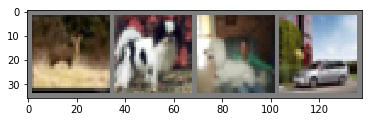

 deer   dog   dog   car


In [263]:
# show some of the training images

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
# print(labels)

# show images
imshow(torchvision.utils.make_grid(images))
plt.show()

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### Define a convolution Neural Network

In [264]:
class Net(nn.Module):
    """
    Copy from previous example with some modification
    """
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution / kernel / filter / neuron
        self.conv1 = nn.Conv2d(3, 6, 5) # change input channel to 3
        self.pool = nn.MaxPool2d(2, 2)  # define only one is enought, since the two pooling layers are the same
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, input): # must define for a nn, tells about the structure
        # Max pooling over a (2, 2) window
        x = self.pool(F.relu(self.conv1(input))) # use defined pool module instead of F.max_pool2d(.., 2)
        x = self.pool(F.relu(self.conv2(x))) 
        x = x.view(-1, 16 * 5 * 5) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)   
        return x
    
net = Net()

### Define a loss function and optimizer

In [265]:
# use classification Cross-Entropy loss and SGD with momentum --???
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Train the network

In [266]:
# loop over our data iterator, and feed the inputs to the network and optimize
for epoch in range(2):  # loop over the dataset multiple times
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        
        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:   # print every 2000 mini-batches
            print('[%d, %5d] loss : %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
    
print('Finished Training')

[1,  2000] loss : 2.190
[1,  4000] loss : 1.854
[1,  6000] loss : 1.651
[1,  8000] loss : 1.563
[1, 10000] loss : 1.526
[1, 12000] loss : 1.478
[2,  2000] loss : 1.397
[2,  4000] loss : 1.382
[2,  6000] loss : 1.352
[2,  8000] loss : 1.299
[2, 10000] loss : 1.313
[2, 12000] loss : 1.290
Finished Training


### 5. Test the network on the test data

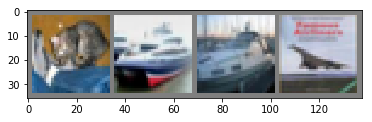

GradTruth(/true label):    cat  ship  ship plane


In [268]:
# first step. Let us display an image from the test set to get familiar.
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
plt.show()
print('GradTruth(/true label): ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [269]:
# now lets used the trained nn to predict labels
outputs = net(Variable(images))

> Note : The outputs are energies for the 10 classes. Higher the energy for a class, the more the network thinks that the image is of the particular class. So, let’s get the index of the highest energy:

In [270]:
_, predicted = torch.max(outputs.data, 1)

In [271]:
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat  ship plane  ship


In [272]:
# test on the whole dataset
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
# if randomly picking a class out of 10 classes, the approximate accuracy will be 10%

Accuracy of the network on the 10000 test images: 56 %


In [273]:
# To know what are the classes that performed well, and the classes that did not perform well:
class_correct = list(0. for i in range(10))  # [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 67 %
Accuracy of   car : 60 %
Accuracy of  bird : 42 %
Accuracy of   cat : 29 %
Accuracy of  deer : 56 %
Accuracy of   dog : 38 %
Accuracy of  frog : 71 %
Accuracy of horse : 66 %
Accuracy of  ship : 65 %
Accuracy of truck : 68 %


## Training on GPU

In [274]:
"""
Just like how you transfer a Tensor on to the GPU, 
you transfer the neural net onto the GPU. 
This will recursively go over all modules and 
convert their parameters and buffers to CUDA tensors:
"""

net.cuda()  # may cause AssertionError if cuda is not available

AssertionError: Torch not compiled with CUDA enabled

In [275]:
"""
Remember that you will have to send the inputs and targets at every step to the GPU too:
"""
inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda()) # may cause AssertionError if cuda is not available

AssertionError: Torch not compiled with CUDA enabled

## nn package (Not for homework)
- torch.nn only supports mini-batches The entire torch.nn package only supports inputs that are a mini-batch of samples, and not a single sample.
- For example, nn.Conv2d will take in a 4D Tensor of nSamples x nChannels x Height x Width.
- If you have a single sample, just use input.unsqueeze(0) to add a fake batch dimension.


## Example 1: ConvNet

In [92]:
import torch.nn as nn
import torch.nn.functional as F

class MNISTConvNet(nn.Module):
    
    def __init__(self):
        # this is the place where you instantiate all your modules
        # you can later access them using the same names you've given them in
        # here
        super(MNISTConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 20, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(320, 50) # fully connected layer1
        self.fc2 = nn.Linear(50, 10) # fully connected layer2
    
    # it's the forward function that defines the network structure
    # we're accepting only a single input in here, but if you want,
    # feel free to use more
    def forward(self, input):
        x = self.pool1(F.relu(self.conv1(input)))
        x = self.pool2(F.relu(self.conv2(x)))
        # in your model definition you can go full crazy and use arbitrary
        # python code to define your model structure
        # all these are perfectly legal, and will be handled correctly
        # by autograd:
        # if x.gt(0) > x.numel() / 2:
        #      ...
        #
        # you can even do a loop and reuse the same module inside it
        # modules no longer hold ephemeral state, so you can use them
        # multiple times during your forward pass
        # while x.norm(2) < 10:
        #    x = self.conv1(x)
        x = x.view(x.size(0), -1)  # ???
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x

In [93]:
# use the defined ConvNet, create an instance of the class first
net = MNISTConvNet()
print(net)

MNISTConvNet (
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (fc1): Linear (320 -> 50)
  (fc2): Linear (50 -> 10)
)


In [96]:
# Create a mini-batch containing a single sample of random data and send the sample through the ConvNet.
input = Variable(torch.randn(1, 1, 28, 28))  # ???
out = net(input)
print(out.size())

torch.Size([1, 10])


In [98]:
# Define a dummy target label and compute error using a loss function
target = Variable(torch.LongTensor([3]))
loss_fn = nn.CrossEntropyLoss() # LogSoftmax + ClassNLL Loss ???
err = loss_fn(out, target)
err.backward()
"""
The output of the ConvNet out is a Variable. We compute the loss using that, 
and that results in err which is also a Variable. Calling .backward on err 
hence will propagate gradients all the way through the ConvNet to it’s weights
"""

print(err)

Variable containing:
 2.3967
[torch.FloatTensor of size 1]



In [99]:
# access individual layer weights and gradients
print(net.conv1.weight.grad.size())  # ???

torch.Size([10, 1, 5, 5])


In [100]:
print(net.conv1.weight.data.norm())  # norm of the weight
print(net.conv1.weight.grad.data.norm())  # norm of the gradients

1.8969228834585605
0.4444073020985585


In [104]:
def printnorm(self, input, output):
    """
    In order to inspect / modify the output and grad_output of a layer,
    we can use hook.
    We can register a function on a Module or a Variable. 
    The hook can be a forward hook or a backward hook. 
    The forward hook will be executed when a forward call is executed.
    The backward hook will be executed in the backward phase.
    """
    # input is a tuple of packed inputs
    # output is a Variable. output.data is the Tensor we are interested
    print('Inside ' + self.__class__.__name__ + ' forward')
    print('')
    print('input: ', type(input))
    print('input[0]: ', type(input[0]))
    print('output: ', type(output))
    print('')
    print('input size: ', input[0].size())
    print('output size: ', output.data.size())
    print('output norm: ', output.data.norm())
    print('')
    
net.conv2.register_forward_hook(printnorm)

out = net(input)

Inside Conv2d forward

input:  <class 'tuple'>
input[0]:  <class 'torch.autograd.variable.Variable'>
output:  <class 'torch.autograd.variable.Variable'>

input size:  torch.Size([1, 10, 12, 12])
output size:  torch.Size([1, 20, 8, 8])
output norm:  13.748090078970105
Inside Conv2d forward

input:  <class 'tuple'>
input[0]:  <class 'torch.autograd.variable.Variable'>
output:  <class 'torch.autograd.variable.Variable'>

input size:  torch.Size([1, 10, 12, 12])
output size:  torch.Size([1, 20, 8, 8])
output norm:  13.748090078970105



In [106]:
# now register a backward hook on conv2 and print some information
def printgradnorm(self, grad_input, grad_output):
    print('Inside ' + self.__class__.__name__ + ' backward')
    print('Inside class: ' + self.__class__.__name__)
    print('')
    print('grad_input: ', type(grad_input))
    print('grad_input[0]: ', type(grad_input[0]))
    print('grad_output: ', type(grad_output))
    print('grad_output[0]: ', type(grad_output[0]))
    print('')
    print('grad_input size: ', grad_input[0].size())
    print('grad_output size: ', grad_output[0].size())
    print('grad_input norm: ', grad_input[0].data.norm())
    print('')
    
net.conv2.register_backward_hook(printgradnorm)

out = net(input)
err = loss_fn(out, target)
err.backward()

Inside Conv2d forward

input:  <class 'tuple'>
input[0]:  <class 'torch.autograd.variable.Variable'>
output:  <class 'torch.autograd.variable.Variable'>

input size:  torch.Size([1, 10, 12, 12])
output size:  torch.Size([1, 20, 8, 8])
output norm:  13.748090078970105
Inside Conv2d forward

input:  <class 'tuple'>
input[0]:  <class 'torch.autograd.variable.Variable'>
output:  <class 'torch.autograd.variable.Variable'>

Inside Conv2d backwardinput size: 
 Inside class: Conv2dtorch.Size([1, 10, 12, 12])

output size: 
 grad_input: torch.Size([1, 20, 8, 8]) 
<class 'tuple'>output norm: 
 grad_input[0]: 13.748090078970105 
<class 'torch.autograd.variable.Variable'>

grad_output:  <class 'tuple'>
grad_output[0]:  <class 'torch.autograd.variable.Variable'>

grad_input size:  torch.Size([1, 10, 12, 12])
grad_output size:  torch.Size([1, 20, 8, 8])
grad_input norm:  0.09604130233119373
Inside Conv2d backward
Inside class: Conv2d

grad_input:  <class 'tuple'>
grad_input[0]:  <class 'torch.autogr

## Example 2: Recurrent Net

In [107]:
"""
Since the state of the network is held in the graph and not in the layers,
we can simply create an nn.Linear and reuse it over and over again for the recurrence.
"""
class RNN(nn.Module):
    # you can also accept arguments in your model constructor
    def __init__(self, data_size, hidden_size, output_size):
        super(RNN, self).__init__()
        
        self.hidden_size = hidden_size
        input_size = data_size + hidden_size
        
        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        
    def forward(self, data, last_hidden):
        input = torch.cat((data, last_hidden), 1)
        hidden = self.i2h(input)
        output = self.h2o(hidden)
        return hidden, output

rnn = RNN(50, 20, 10)

In [108]:
loss_fn = nn.MSELoss()

batch_size = 10
TIMESTEPS = 5

# Create some fake data
batch = Variable(torch.randn(batch_size, 50))
hidden = Variable(torch.zeros(batch_size, 20))
target = Variable(torch.zeros(batch_size, 10))

loss = 0
for t in range(TIMESTEPS):
    # yes! you can reuse the same network several times,
    # sum up the losses, and call backward!
    hidden, output = rnn(batch, hidden)
    loss += loss_fn(output, target)
loss.backward()